<a href="https://colab.research.google.com/github/geonextgis/PyImgProc-Image-Processing-using-Python/blob/main/21_waterbodies_extraction_using_entropy_and_otsu's_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Bodies Extraction using Entropy and Otsu's Threshold**

## **Import Required Libraries**

In [13]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_otsu

plt.rcParams["font.family"] = "DejaVu Serif"

## **Load the Image**

In [15]:
# Read the image with skimage
img_path = "/content/drive/MyDrive/Colab Notebooks/GitHub Repo/PyImgProc-Image-Processing-using-Python/Datasets/High_Res_RGB_Google_Image.tif"
img = io.imread(img_path)
print(img.shape)

(2048, 2048, 3)


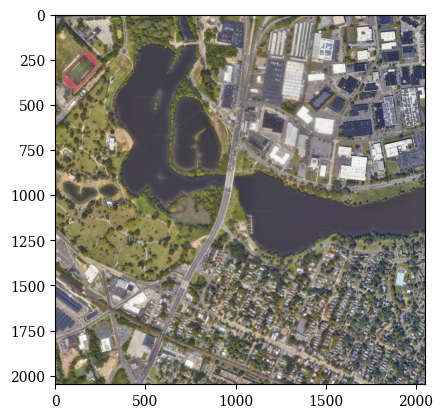

In [16]:
# Plot the image
plt.imshow(img);

## **Applying Entropy Filter**
In image processing, an entropy filter is a type of spatial filter used to enhance or detect features in an image based on the concept of entropy. Entropy, in the context of image processing, measures the amount of randomness or uncertainty in the distribution of pixel values within a neighborhood of the image.

#### **How Entropy Filter Works**

1. **Neighborhood Definition**: Similar to other spatial filters, an entropy filter operates by sliding a window or kernel across the image. This window defines a local neighborhood around each pixel.

2. **Entropy Calculation**: Within each neighborhood, the entropy filter computes the entropy of the pixel values. Entropy is calculated using the histogram of pixel intensities within the neighborhood. The formula for entropy calculation is often based on Shannon's entropy formula:

   $$H = -\sum_{i} P(i) \log_2 P(i)$$

   where $P(i)$ represents the probability of occurrence of pixel value $i$ within the neighborhood. The sum is taken over all possible pixel values.

3. **Filter Response**: The calculated entropy value for each neighborhood is used to determine the response of the filter. Typically, high entropy values indicate regions with high variability or complexity, while low entropy values indicate regions with more uniform intensity distributions.

4. **Enhancement or Detection**: Depending on the application, the entropy filter may enhance regions with high entropy (e.g., edges, textures) or suppress regions with low entropy (e.g., uniform regions, noise).

#### **Applications of Entropy Filter**

1. **Texture Analysis**: Entropy filters are often used for texture analysis in images. Regions with high entropy correspond to complex textures, while regions with low entropy correspond to smoother textures.

2. **Edge Detection**: Entropy filters can be used for edge detection since edges often correspond to regions with high variability in pixel values.

3. **Image Segmentation**: Entropy-based segmentation methods use entropy filters to identify regions with distinct texture or intensity characteristics.

4. **Noise Reduction**: By suppressing regions with low entropy, entropy filters can help reduce noise in an image.


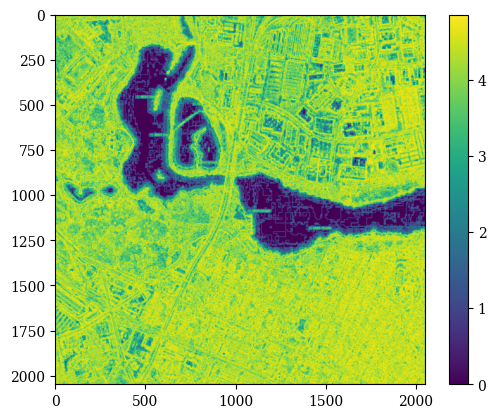

In [39]:
# Apply the entropy filter on red channel of the RGB image
entropy_img = entropy(img[:, :, 0], footprint=disk(3))

# Plot the entropy image
plt.imshow(entropy_img)
plt.colorbar();

## **Applying Otsu's Thresholding**
Otsu's thresholding is a global thresholding technique used in image processing to automatically perform clustering-based image thresholding. Named after Nobuyuki Otsu, who introduced it in 1979, the method is used to convert a grayscale image into a binary image by finding an optimal threshold that minimizes the intra-class variance or equivalently maximizes the inter-class variance.

#### **How Otsu's Thresholding Works**

1. **Histogram Calculation**: Compute the histogram of the grayscale image, which represents the frequency of each gray level (intensity).

2. **Probability Distribution**: Normalize the histogram to obtain the probability distribution of each gray level.

3. **Class Probabilities and Means**:
   - For each possible threshold $( t )$:
     - Compute the class probabilities:
       $$
       \omega_0(t) = \sum_{i=0}^{t-1} P(i) \quad \text{(probability of class 1)}
       $$
       $$
       \omega_1(t) = \sum_{i=t}^{L-1} P(i) \quad \text{(probability of class 2)}
       $$
     - Compute the class means:
       $$
       \mu_0(t) = \frac{\sum_{i=0}^{t-1} i \cdot P(i)}{\omega_0(t)}
       $$
       $$
       \mu_1(t) = \frac{\sum_{i=t}^{L-1} i \cdot P(i)}{\omega_1(t)}
       $$
    

4. **Intra-Class Variance Calculation**: Calculate the intra-class variance for each threshold $( t )$:
   $$
   \sigma^2_w(t) = \omega_0(t) \sigma^2_0(t) + \omega_1(t) \sigma^2_1(t)
   $$

   where $ \sigma^2_0(t) $ and $ \sigma^2_1(t) $ are the variances of the two classes, computed as:
   $$
   \sigma^2_0(t) = \sum_{i=0}^{t-1} (\mu_0(t) - i)^2 P(i)
   $$

   $$
   \sigma^2_1(t) = \sum_{i=t}^{L-1} (\mu_1(t) - i)^2 P(i)
   $$

5. **Optimal Threshold Selection**: The optimal threshold $( t^* )$ is the one that minimizes the intra-class variance (or equivalently, maximizes the inter-class variance):
   $$
   t^* = \arg \min_{t} \sigma^2_w(t)
   $$

#### **Applications**

- **Image Binarization**: Converting grayscale images to binary images for applications such as document scanning, medical imaging, and industrial inspection.
- **Object Segmentation**: Separating objects from the background in an image.
- **Preprocessing**: Preparing images for further analysis by reducing complexity.

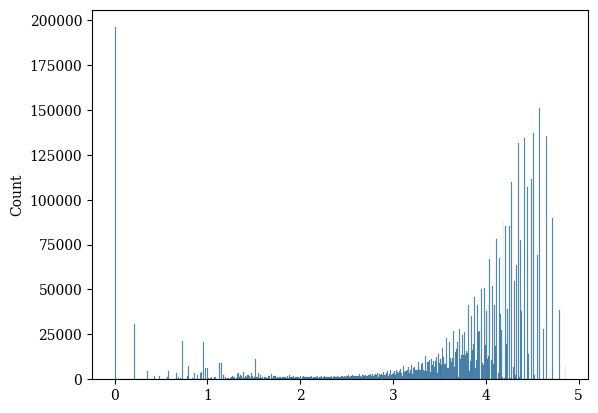

In [50]:
# Plot the histogtam of the entropy image
sns.histplot(entropy_img.flatten());

In [47]:
# Apply Otsu's thresholding on entropy image
# Get the Otsu's threshold value
thresh = threshold_otsu(entropy_img)
print("Otsu's threshold value:", thresh)

Otsu's threshold value: 2.438478741694894


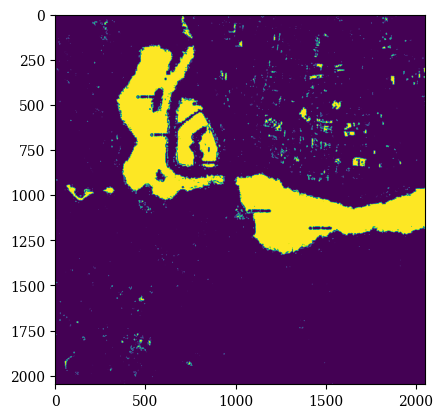

In [52]:
# Create a binary image
binary_img = entropy_img <= thresh

# Plot the binary image
plt.imshow(binary_img);

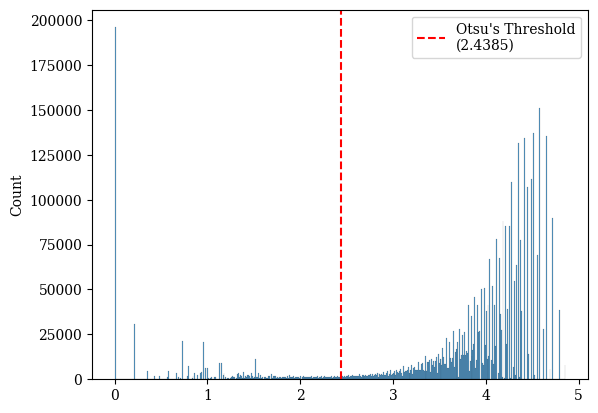

In [60]:
# Plot the Otsu's threshold on the histogram
plt.figure()

ax = sns.histplot(entropy_img.flatten())
plt.axvline(x=thresh, c="red", linestyle="--", label=f"Otsu's Threshold\n({round(thresh, 4)})")
plt.legend();

## **Plot all the Images in a Single Layout**

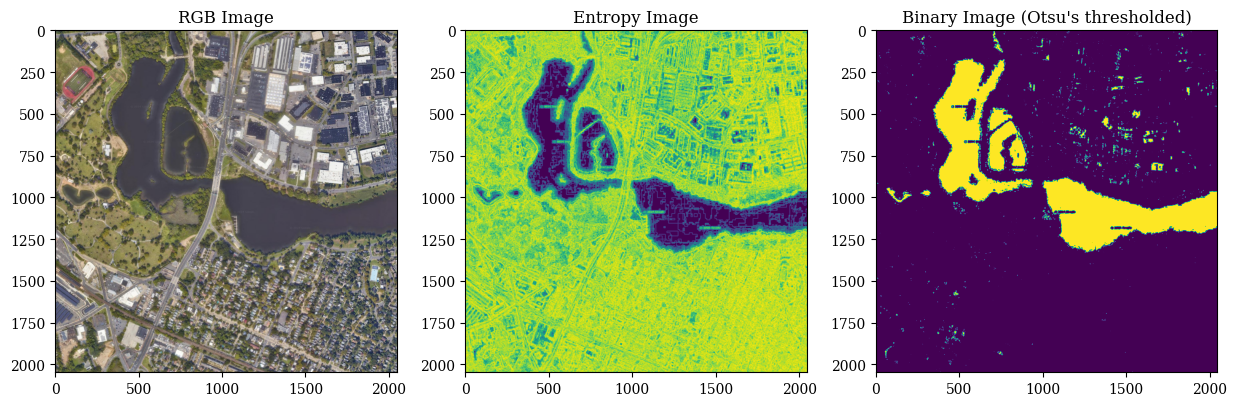

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()

axes[0].imshow(img)
axes[0].set_title("RGB Image")

axes[1].imshow(entropy_img)
axes[1].set_title("Entropy Image")

axes[2].imshow(binary_img)
axes[2].set_title("Binary Image (Otsu's thresholded)");